In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines


os.chdir("../")

SRC_PATH = ["src"]
for module_path in SRC_PATH:
    if module_path not in sys.path:
        sys.path.append(module_path)

from utils import *

# Experiment 1

## distil_roberta-base

In [4]:
detector = "distil_roberta-base"
training_method = "adapter"
model_code = "16_04_1545"
eval_acc_df_distil_adapter, degrad_loss_df_distil_adapter, training_loss_df_distil_adapter = create_df_from_training_logs(detector, training_method, model_code)

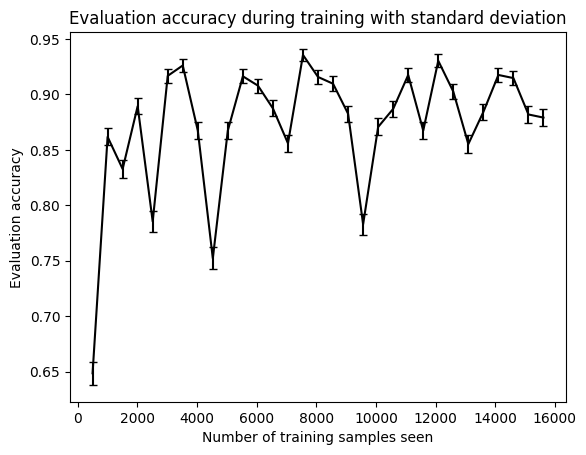

In [5]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_adapter)

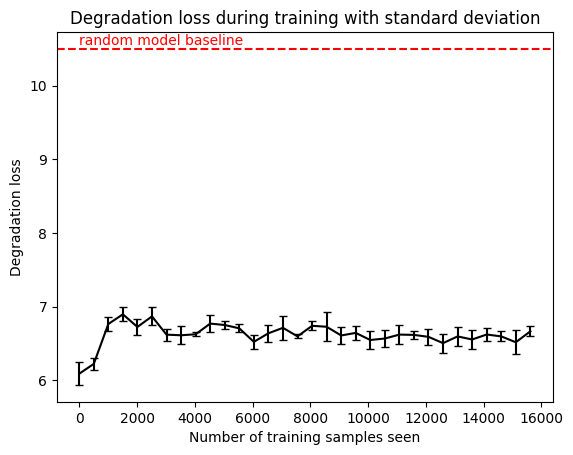

In [13]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_adapter)

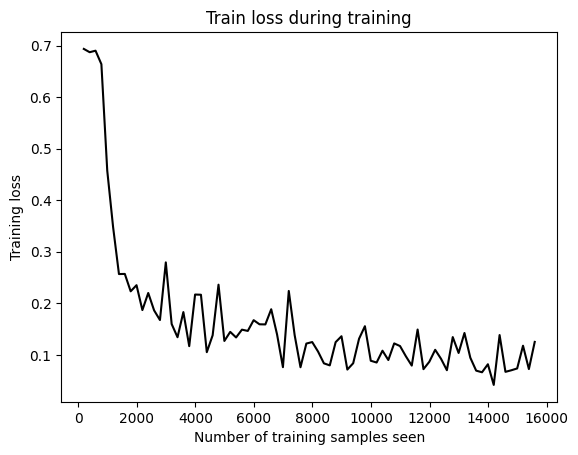

In [14]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_adapter)

In [15]:
detector = "distil_roberta-base"
training_method = "full_finetuning"
model_code = "16_04_1558"
eval_acc_df_distil_full, degrad_loss_df_distil_full, training_loss_df_distil_full = create_df_from_training_logs(detector, training_method, model_code)

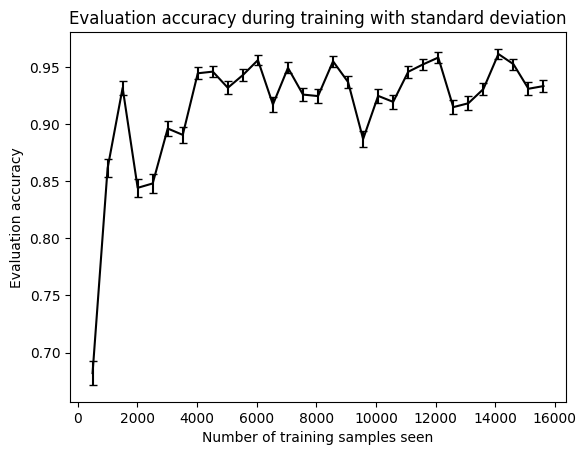

In [16]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_full)

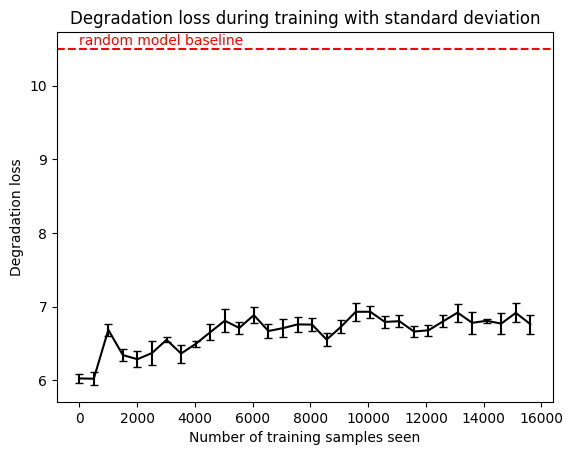

In [17]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_full)

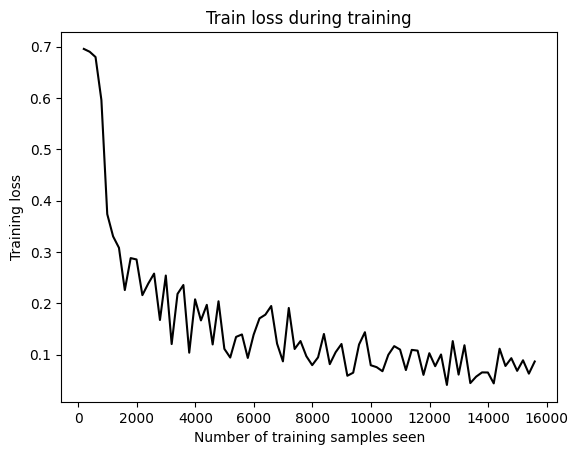

In [18]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_full)

## roberta_large

In [19]:
detector = "roberta_large"
training_method = "adapter"
model_code = "16_04_1602"
eval_acc_df_large_adapter, degrad_loss_df_large_adapter, training_loss_df_large_adapter = create_df_from_training_logs(detector, training_method, model_code)

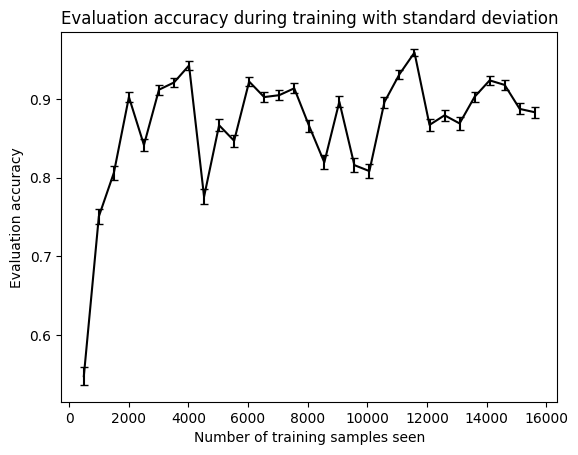

In [20]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_adapter)

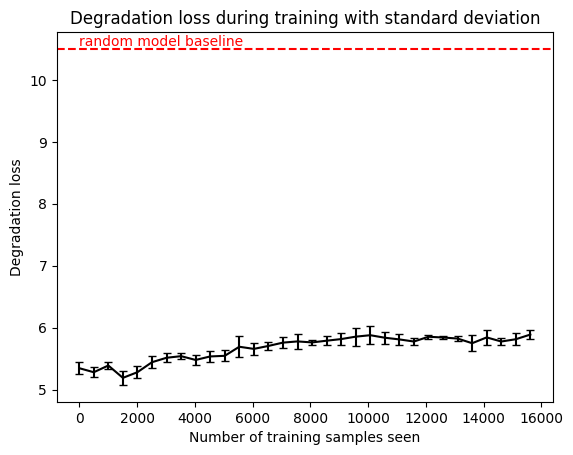

In [21]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_adapter)

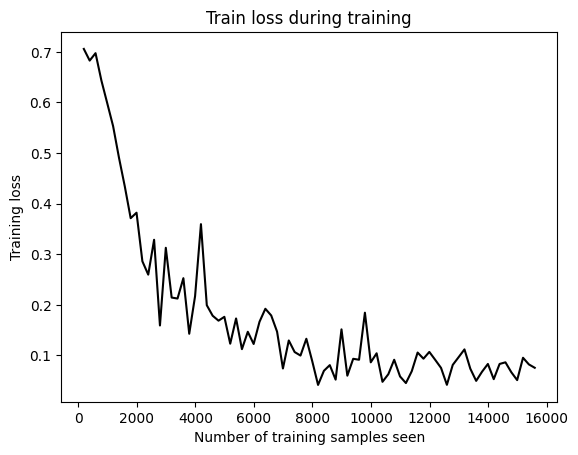

In [22]:
plot_training_loss_vs_nb_samples(training_loss_df_large_adapter)

In [23]:
detector = "roberta_large"
training_method = "full_finetuning"
model_code = "16_04_1648"
eval_acc_df_large_full, degrad_loss_df_large_full, training_loss_df_large_full = create_df_from_training_logs(detector, training_method, model_code)

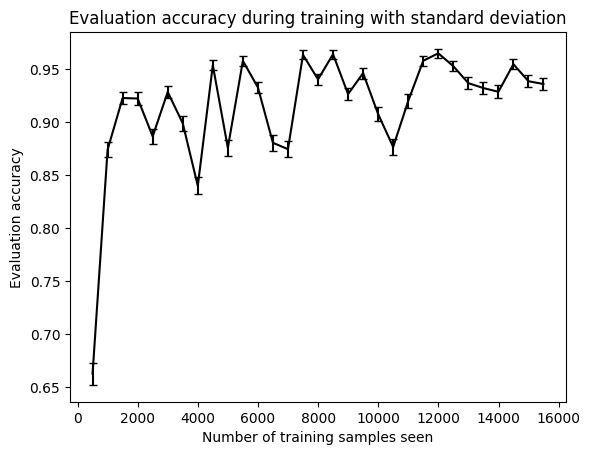

In [24]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_full)

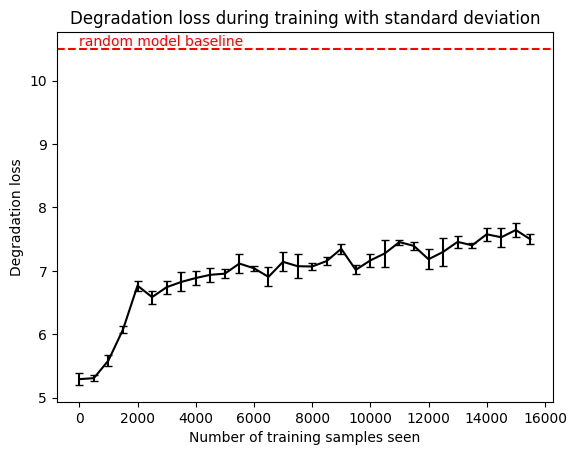

In [25]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_full)

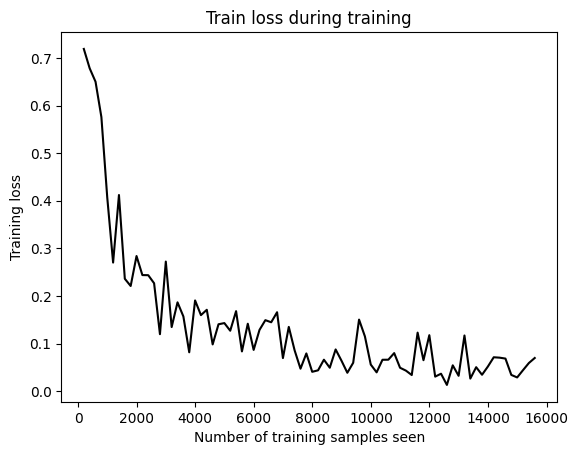

In [26]:
plot_training_loss_vs_nb_samples(training_loss_df_large_full)

## pannel plots

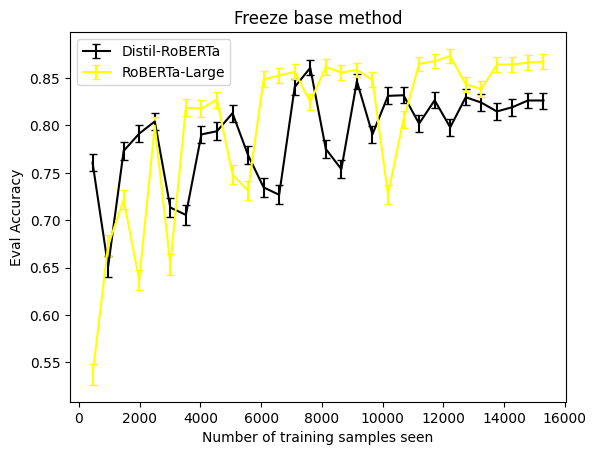

In [27]:
detector = "distil_roberta-base"
training_method = "freeze_base"
model_code = "16_04_1538"
eval_acc_df_distil_freeze_base, degrad_loss_df_distil_freeze_base, training_loss_df_distil_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

detector = "roberta_large"
training_method = "freeze_base"
model_code = "16_04_1539"
eval_acc_df_large_freeze_base, degrad_loss_df_large_freeze_base, training_loss_df_large_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

plot_compared_model_size_eval_acc(eval_acc_df_distil_freeze_base, eval_acc_df_large_freeze_base)

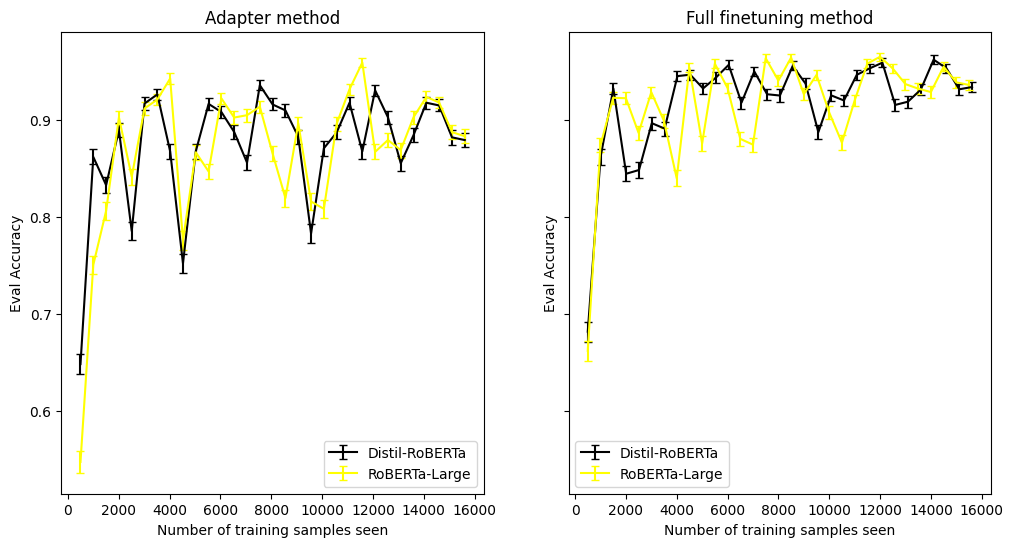

In [28]:
plot_panel_model_and_training_method_eval_acc(eval_acc_df_distil_adapter, eval_acc_df_distil_full, eval_acc_df_large_adapter, eval_acc_df_large_full)

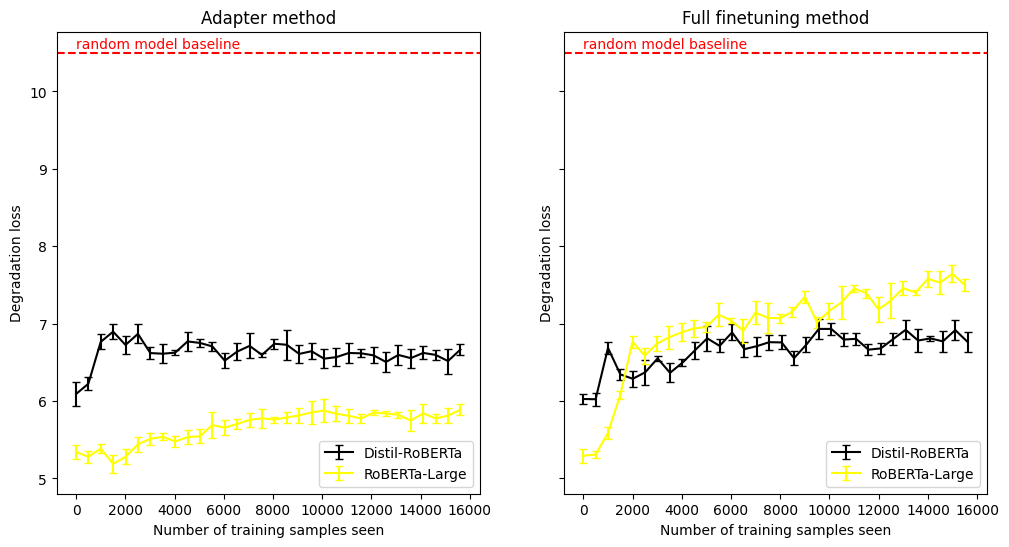

In [29]:
plot_panel_model_and_training_method_degrad(degrad_loss_df_distil_adapter, degrad_loss_df_distil_full, degrad_loss_df_large_adapter, degrad_loss_df_large_full)

# Experiment 2

## freeze base

In [2]:
dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr", "round_robin"]

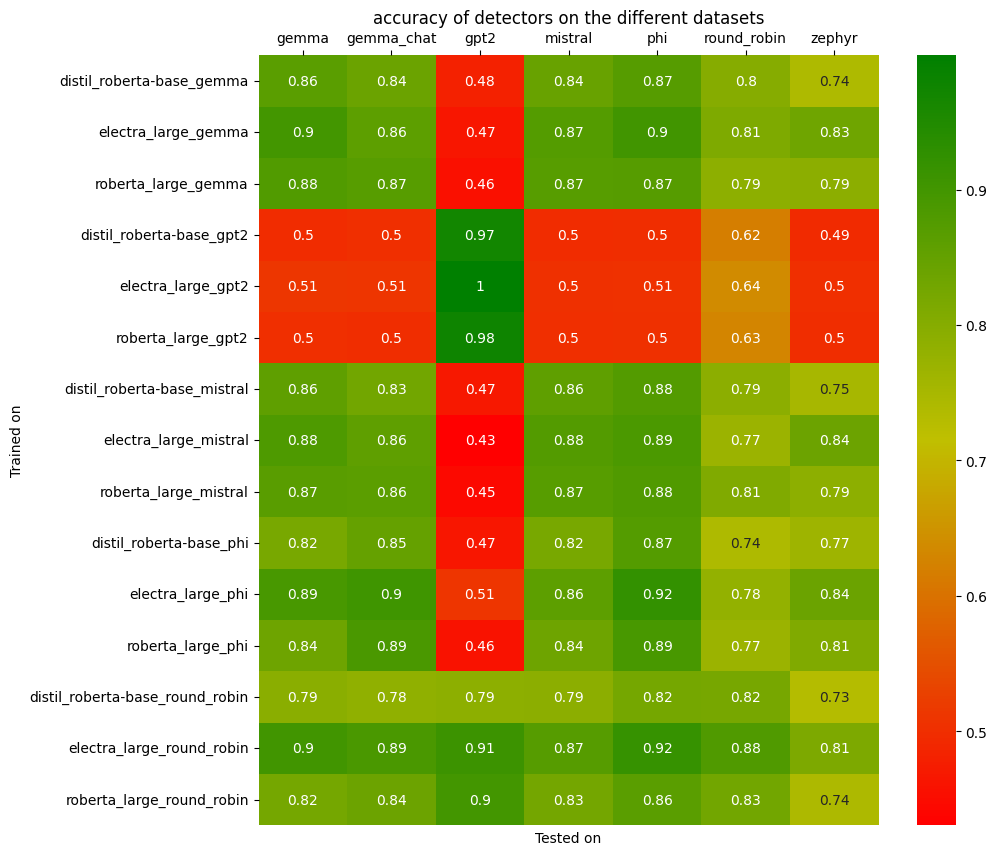

In [3]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"10_04_1702":"gpt2", "10_04_1706": "phi", "10_04_1710": "gemma", "15_04_1243": "mistral", "15_04_1250": "round_robin"},
                    "roberta_large": {"10_04_1703":"gpt2", "10_04_1723": "phi", "10_04_1742": "gemma", "15_04_1244": "mistral", "15_04_1259": "round_robin"},
                    "electra_large": {"10_04_1814":"gpt2", "10_04_1832": "phi", "10_04_1848": "gemma", "15_04_1245": "mistral", "15_04_1300": "round_robin"}}


dataset_names = ["gpt2", "phi", "gemma", "mistral", "round_robin", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("freeze_base", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy", with_std=False)

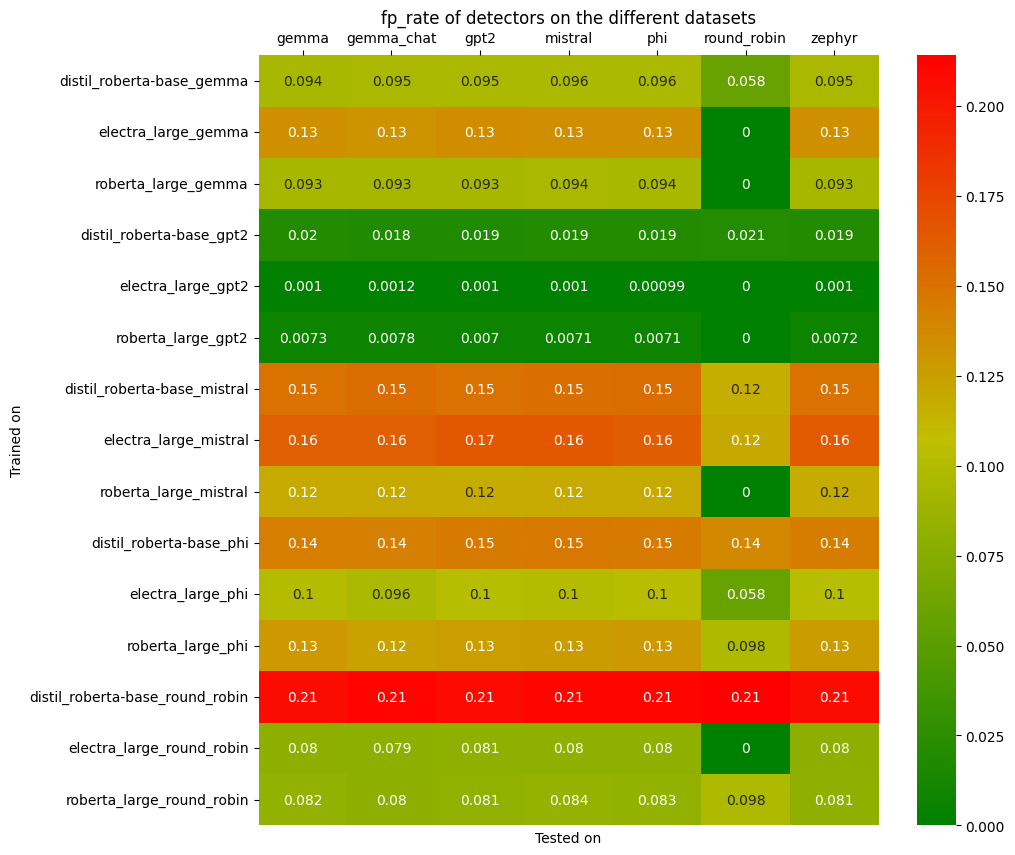

In [4]:
heatmap_from_df(freeze_base_df, "fp_rate", with_std=False)

## Adapter

In [15]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "adapter"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"11_04_1434":"gpt2", "11_04_1447": "phi", "11_04_1459": "gemma", "15_04_1254": "mistral", "15_04_1306": "round_robin"},
                    "roberta_large": {"11_04_1434":"gpt2", "11_04_1519": "phi", "11_04_1604": "gemma", "15_04_1308": "mistral", "15_04_1333": "round_robin"},
                    "electra_large": {"10_04_1928":"gpt2", "10_04_1952": "phi", "10_04_2016": "gemma", "15_04_1308": "mistral", "15_04_1332": "round_robin"}}


freeze_base_df = create_df_from_test_logs("adapter", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

FileNotFoundError: [Errno 2] No such file or directory: './saved_training_logs_experiment_2/roberta_large/adapter/fake_true_dataset_mistral_10k/15_04_1308/test/test_metrics_fake_true_dataset_gpt2_10k.json'

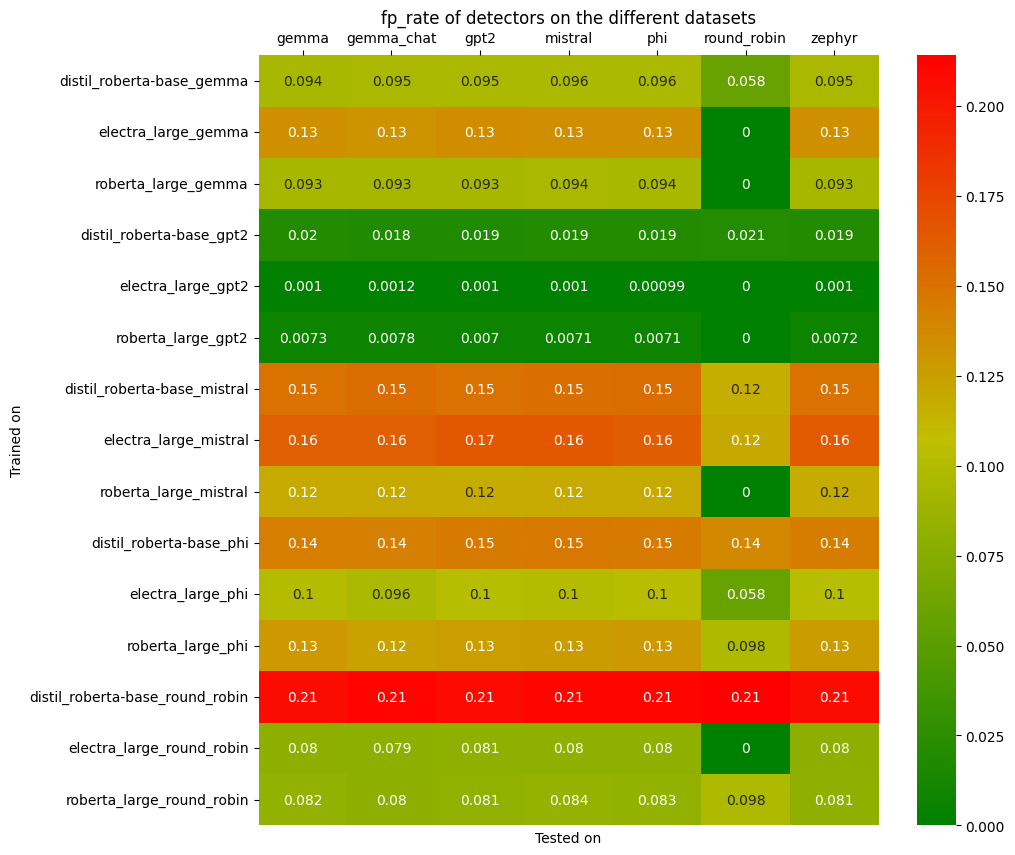

In [6]:
heatmap_from_df(freeze_base_df, "fp_rate")

## full_finetuning

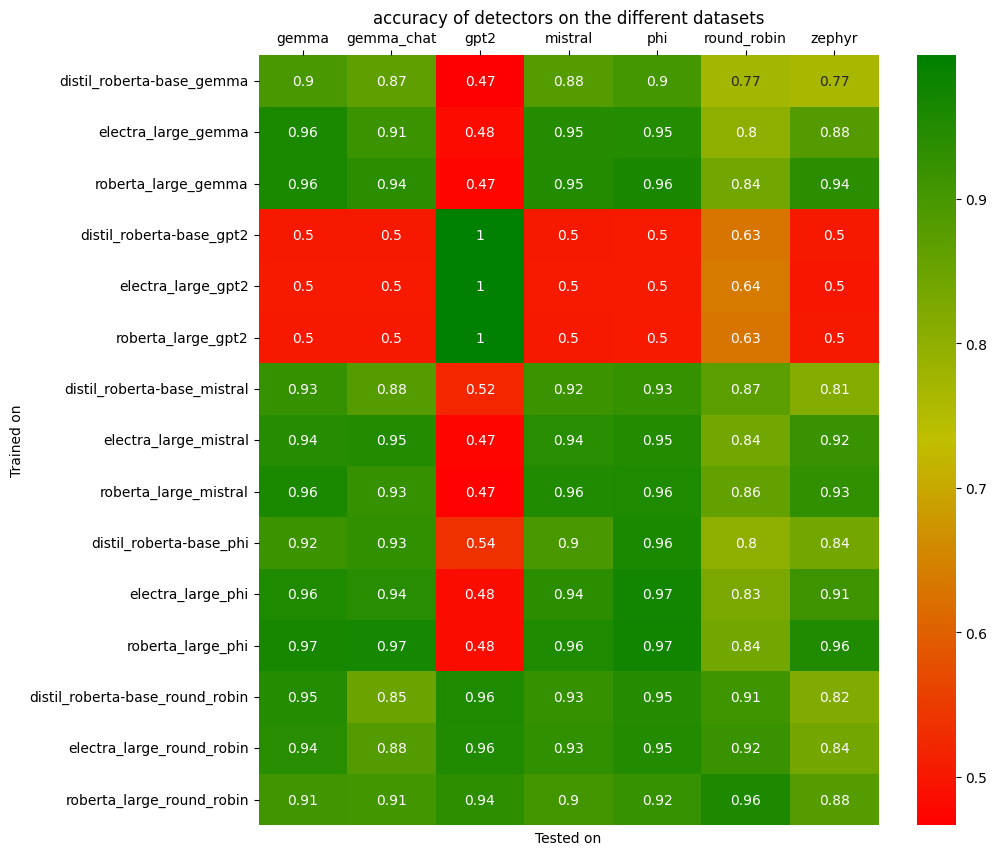

In [3]:
dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr", "round_robin"]
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"11_04_1532":"gpt2", "11_04_1553": "phi", "11_04_1558": "gemma", "15_04_1314": "mistral", "15_04_1318": "round_robin"},
                    "roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"},
                    "electra_large": {"10_04_2114":"gpt2", "10_04_2125": "phi", "10_04_2137": "gemma", "15_04_1344": "mistral", "15_04_1356": "round_robin"}}


freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

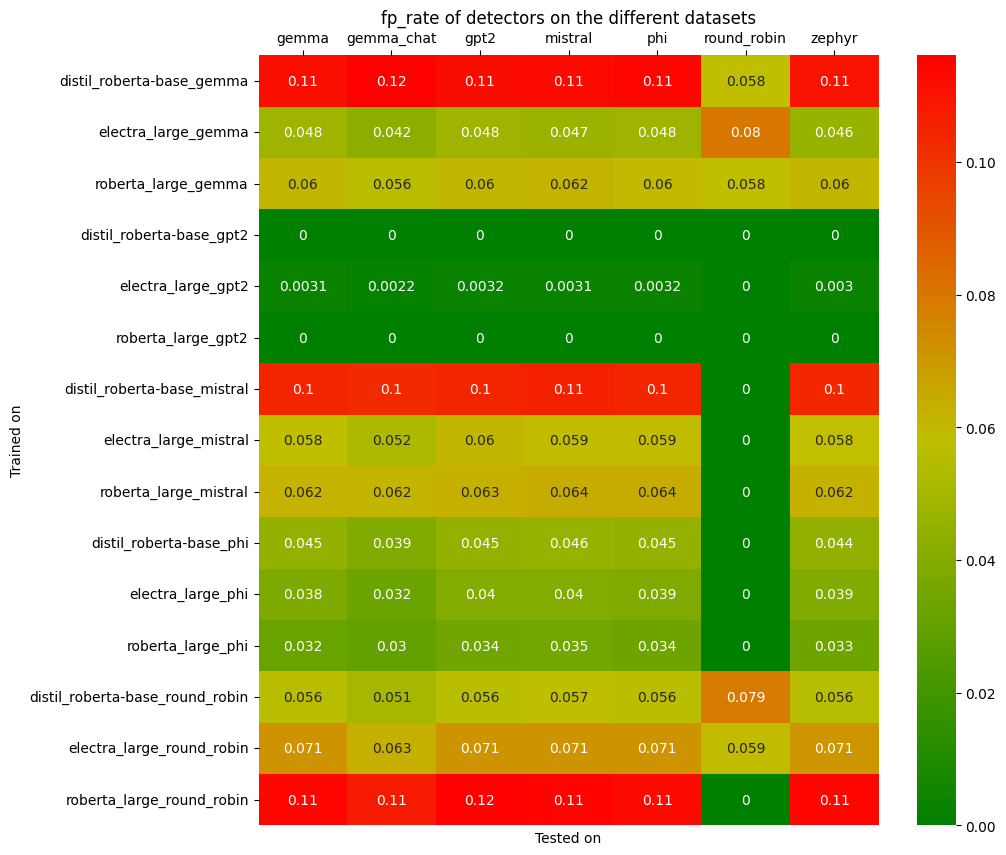

In [4]:
heatmap_from_df(freeze_base_df, "fp_rate")

# With Detect GPT and roberta_open_ai


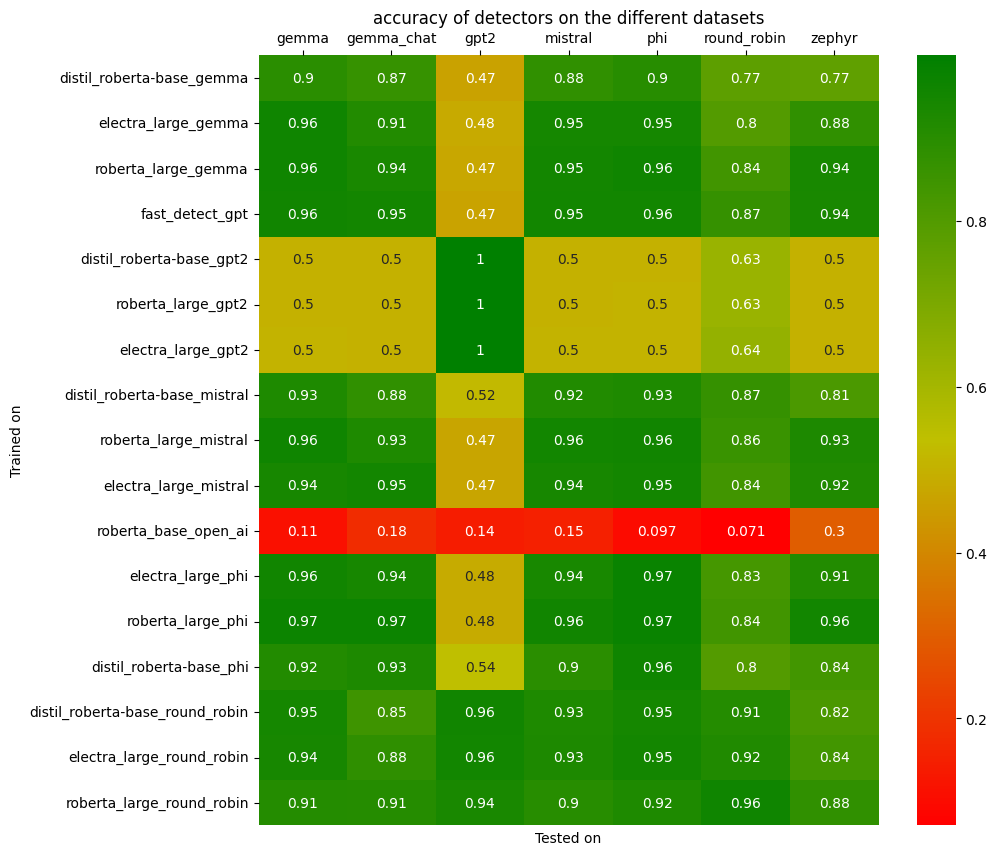

In [5]:
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"11_04_1532":"gpt2", "11_04_1553": "phi", "11_04_1558": "gemma", "15_04_1314": "mistral", "15_04_1318": "round_robin"},
                    "roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"},
                    "electra_large": {"10_04_2114":"gpt2", "10_04_2125": "phi", "10_04_2137": "gemma", "15_04_1344": "mistral", "15_04_1356": "round_robin"}}


fast_detect_gpt_results = {"fast_detect_gpt": {"17_04_1515": "gpt2", "17_04_1521" : "phi", "17_04_1527" : "gemma", "17_04_1534" : "mistral", "17_04_1540" : "round_robin",
                           "17_04_1544": "gemma_chat", "17_04_1550" : "zephyr"}}
roberta_open_ai_results = {"roberta_base_open_ai": {"18_04_1622": "gpt2", "18_04_1623" : "phi", "18_04_1624" : "gemma", "18_04_1715" : "mistral", "18_04_1625" : "round_robin",
                           "18_04_1634": "gemma_chat", "18_04_1636" : "zephyr"}}
freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)

freeze_base_df = add_test_logs_to_results_df(freeze_base_df, fast_detect_gpt_results)
freeze_base_df = add_test_logs_to_results_df(freeze_base_df, roberta_open_ai_results)

heatmap_from_df(freeze_base_df, "accuracy")

# Remove special chars

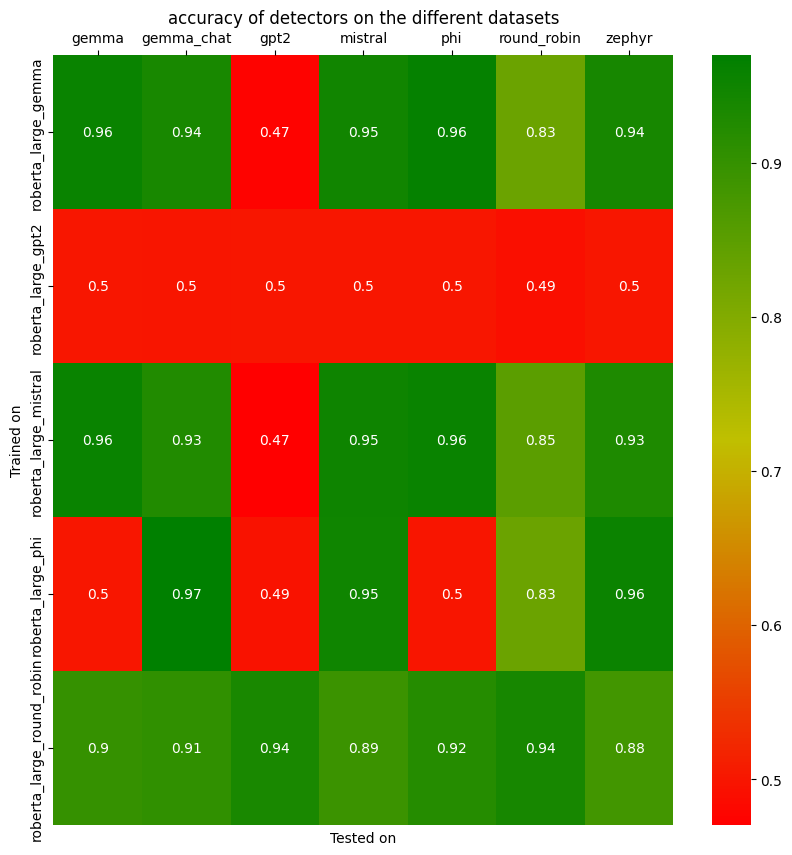

In [10]:
dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr", "round_robin"]
suffix = "normalized"
training_method = "full_finetuning"
trained_on_models = {"roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"}}

freeze_base_df = create_df_from_test_logs_modified("full_finetuning", trained_on_models, dataset_names, suffix)
heatmap_from_df(freeze_base_df, "accuracy")

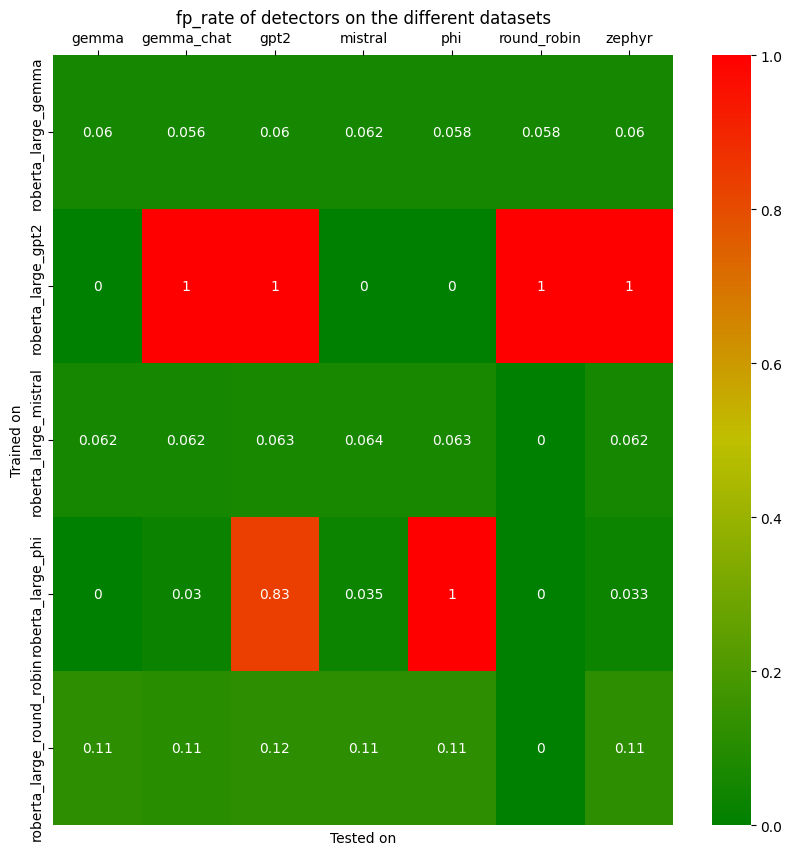

In [11]:
heatmap_from_df(freeze_base_df, "fp_rate")

# Special apostrophes

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

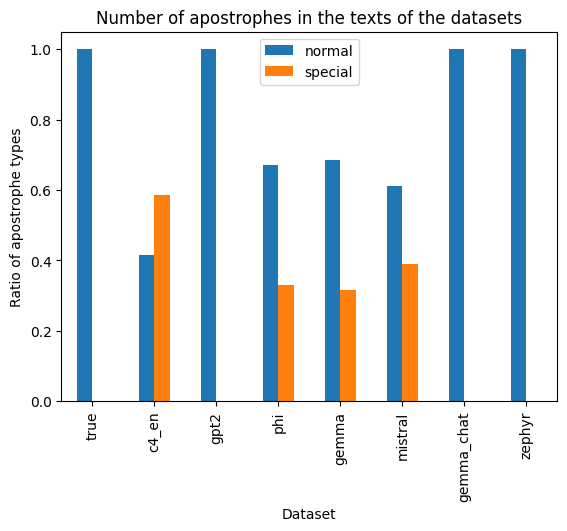

In [8]:
def count_apostrophes_absolute(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    return count_apostrophe_type_1, count_apostrophe_type_2


def count_apostrophes_relative(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    total_apostrophes = count_apostrophe_type_1 + count_apostrophe_type_2

    relative_count_apostrophe_type_1 = count_apostrophe_type_1 / total_apostrophes
    relative_count_apostrophe_type_2 = count_apostrophe_type_2 / total_apostrophes

    return relative_count_apostrophe_type_1, relative_count_apostrophe_type_2


count_apostrophes_dict = {}
true_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_mistral_10k_train.json")
true_texts_df = true_train_dataset_df[true_train_dataset_df["label"] == 0]
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(true_texts_df["text"].apply(lambda x: x[0]))
count_apostrophes_dict["true"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}

en_dataset = load_dataset("allenai/c4", "en", streaming=True)
sample_size = 100000
en_dataset_sample = en_dataset["train"].shuffle(seed=42).take(sample_size)
en_dataset_sample_df = pd.DataFrame(en_dataset_sample)
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(en_dataset_sample_df["text"])
count_apostrophes_dict["c4_en"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}



# load the datasets
datasets = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]

for dataset in datasets:
    experiment_name = f"{dataset}_10k"
    fake_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}_train.json")

    fake_texts_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 1]
    count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(fake_texts_df["text"].apply(lambda x: x[0]))
    count_apostrophes_dict[dataset] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}


# plot the results with a bar plot per dataset
count_apostrophes_df = pd.DataFrame(count_apostrophes_dict).T
count_apostrophes_df.plot(kind="bar")
plt.title("Number of apostrophes in the texts of the datasets")
plt.xlabel("Dataset")
plt.ylabel("Ratio of apostrophe types")
plt.show()



In [5]:
en_dataset_sample_df["text"][0]

'You’ve probably heard the old proverb that failing to plan is planning to fail, but consider this: according to statistics, a whopping 70 percent of all project come in late and over budget, or are scrapped before completion. In fact, project failure is virtually expected in a number of industries today. Some 75 percent of executives, for example, believe their project will fail before they even start.\nAt the same time, companies and organizations that find better ways to plan and manage projects are highly rewards for it. High performing companies and organizations successfully complete nearly nine out of ten of their planned projects, while low performers complete less than four.\nOpportunities and risks within the broader society, such as differences in local and international markets, the project’s impact on the environment, the health of the world economy, and more.\nNot taking these points into consideration can mean failure for your project. Here’s a case study to illustrate t

In [9]:
count_apostrophes

{'gpt2': {'normal': 13888, 'special': 0},
 'phi': {'normal': 21122, 'special': 3548},
 'gemma': {'normal': 29374, 'special': 7343},
 'mistral': {'normal': 36474, 'special': 11870},
 'gemma_chat': {'normal': 42931, 'special': 11872},
 'zephyr': {'normal': 51375, 'special': 11873}}